In [28]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import imageio
import numpy as np
from keras.preprocessing.image import img_to_array
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from keras.optimizers import Adam

import keras
from keras.models import Sequential
from sklearn.metrics  import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
#from keras.preprocessing.image import ImageDataGenerator

import seaborn as sns
from sklearn.metrics import confusion_matrix



In [29]:
data_dir = 'C:/Users/fatjo/OneDrive/Desktop/GridMask'

In [30]:
batch_size = 10

In [31]:

Name=[]
for file in os.listdir(data_dir):
  Name+=[file]
print(Name)
print(len(Name))

['2x2', '2x3', '2x4', '4x4f']
4


In [32]:
N=[]
for i in range(len(Name)):
  N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

In [33]:
datax0=[]
datay0=[]
count=0
for file in tqdm(Name):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        datax0.append(image)
        datay0.append(count)
    count=count+1

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:18<00:00,  4.66s/it]


In [34]:
n=len(datax0)
M=[]
for i in range(n):
    M+=[i]
random.shuffle(M)

In [35]:
datax1=np.array(datax0)
datay1=np.array(datay0)

In [36]:
trainx0=datax1[M[0:(n//4)*3]]
testx0=datax1[M[(n//4)*3:]]
trainy0=datay1[M[0:(n//4)*3]]
testy0=datay1[M[(n//4)*3:]]

In [37]:
trainy2=to_categorical(trainy0)
X_train=np.array(trainx0).reshape(-1,150,150,3)
y_train=np.array(trainy2)

In [38]:
X_test=np.array(testx0).reshape(-1,150,150,3)

In [39]:
trainx,testx,trainy,testy=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [40]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(960, 150, 150, 3)
(240, 150, 150, 3)
(960, 4)
(240, 4)


In [41]:
#model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(30,30, 4), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))  # Add max pooling for regularization
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))  # Add max pooling for regularization
#model.add(Dropout(0.2))  # Regularization to prevent overfitting
#model.add(Flatten())
#model.add(Dense(128, activation='relu')) #density war 100
#model.add(Dense(4, activation='softmax'))

In [42]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Add max pooling for regularization
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Add max pooling for regularization
model.add(Dropout(0.2))  # Regularization to prevent overfitting
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Density war 300
model.add(Dense(4, activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 165888)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    21,233,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,309,956 (81.29 MB)

 Trainable params: 21,309,956 (81.29 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
his = model.fit(X_train, y_train, validation_split=0.2, epochs = 20, batch_size=1, verbose=2)

Epoch 1/20


960/960 - 219s - 228ms/step - accuracy: 0.2250 - loss: 1.4709 - val_accuracy: 0.2083 - val_loss: 1.3845
Epoch 2/20
960/960 - 209s - 218ms/step - accuracy: 0.3677 - loss: 1.3229 - val_accuracy: 0.5250 - val_loss: 1.0813
Epoch 3/20
960/960 - 202s - 211ms/step - accuracy: 0.6500 - loss: 0.8477 - val_accuracy: 0.6958 - val_loss: 0.7343
Epoch 4/20
960/960 - 203s - 212ms/step - accuracy: 0.8323 - loss: 0.4628 - val_accuracy: 0.8083 - val_loss: 0.6383
Epoch 5/20
960/960 - 191s - 199ms/step - accuracy: 0.9187 - loss: 0.2060 - val_accuracy: 0.8042 - val_loss: 0.7635
Epoch 6/20
960/960 - 198s - 206ms/step - accuracy: 0.9708 - loss: 0.0952 - val_accuracy: 0.8208 - val_loss: 0.7710
Epoch 7/20
960/960 - 205s - 213ms/step - accuracy: 0.9729 - loss: 0.0982 - val_accuracy: 0.7625 - val_loss: 1.2647
Epoch 8/20
960/960 - 209s - 218ms/step - accuracy: 0.9802 - loss: 0.0656 - val_accuracy: 0.8375 - val_loss: 0.9216
Epoch 9/20
960/960 - 230s - 239ms/step - accuracy: 0.9865 - loss: 0.0317 - val_accuracy: 0.

In [46]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [47]:
#his = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=1, verbose=2, callbacks=[early_stopping])


In [48]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       0.93      0.96      0.94        52
           2       0.98      0.94      0.96        67
           3       0.98      0.98      0.98        56

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240



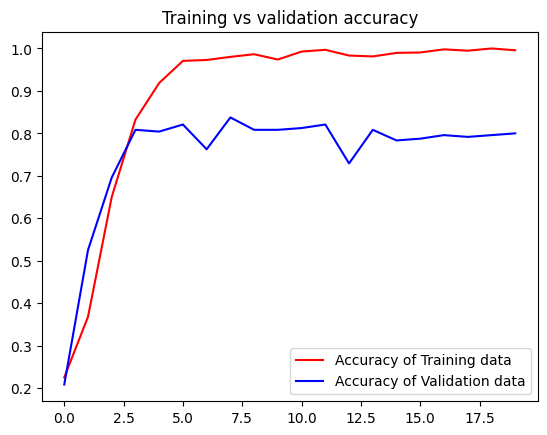

<Figure size 640x480 with 0 Axes>

In [49]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

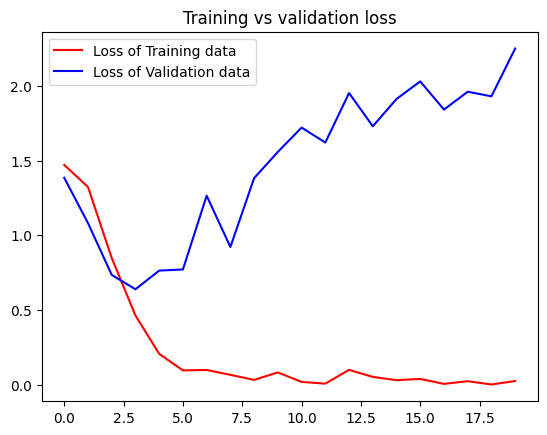

<Figure size 640x480 with 0 Axes>

In [50]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [51]:
pred2=model.predict(X_test)
print(pred2[0:10])

PRED=[]
for item in pred2:
    value2=np.argmax(item)
    PRED+=[value2]
print(PRED[0:10])

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step
[[4.0055075e-27 3.7553741e-13 3.0058130e-22 1.0000000e+00]
 [5.9850759e-14 1.8114513e-10 1.0000000e+00 2.4752563e-18]
 [1.2159434e-07 9.9999857e-01 1.2502807e-06 1.5858098e-10]
 [9.9983811e-01 1.6166936e-04 8.4879623e-08 3.8783863e-08]
 [2.1593083e-13 1.9280521e-06 5.8566867e-11 9.9999809e-01]
 [3.7464806e-11 1.2209746e-06 9.9999869e-01 7.2367357e-08]
 [3.1534385e-16 6.1657788e-06 2.8948392e-05 9.9996483e-01]
 [4.2632204e-03 3.2239270e-03 1.1065120e-03 9.9140632e-01]
 [2.7755127e-09 9.9563438e-01 1.7063266e-10 4.3656155e-03]
 [1.8161562e-14 2.2579258e-09 1.3474163e-12 1.0000000e+00]]
[3, 2, 1, 0, 3, 2, 3, 3, 1, 3]


In [52]:
ANS=list(testy0)
ANS[0:10]

[3, 2, 1, 1, 3, 2, 2, 3, 2, 3]

In [53]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.7825


In [54]:
cm = confusion_matrix(ANS, PRED)

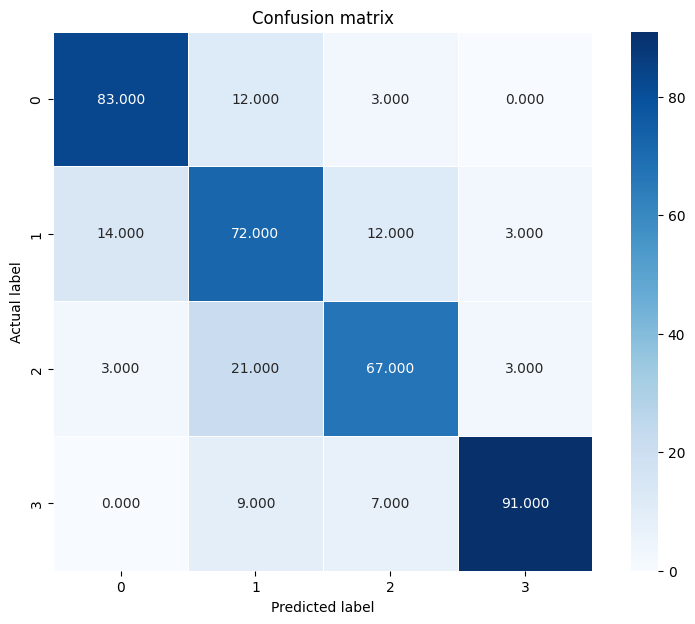

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()